# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/kristinaglass/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [2]:
### ===== FINAL CODE =====

# import libraries and functions

import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely.geometry import Point, box

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# ------------------------------------------

#import raster as lulc.fp
lulc_fp = os.path.join(os.getcwd(), 'data', 'land_cover.tif')
#create lulc variable
lulc = rioxr.open_rasterio(lulc_fp)

# ------------------------------------------

# import CA shapefile as ca
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# ------------------------------------------

# create points of lulc bounding box
lulc1 = box(*lulc.rio.bounds())

# create geodataframe with lulc box
bbox = gpd.GeoDataFrame(geometry= [lulc1],
                           crs= lulc.rio.crs)

# ------------------------------------------

# create mount whitney coordinate point
point = (-13168238.600765156, 4380516.844251228)

#create mt whitney point with  coordinates point
mt_whitney = gpd.GeoDataFrame(geometry = [Point(point)],
                             crs=3857)

#update bbox CRS
bbox.to_crs(crs = 3857, inplace = True)

## Import libraries and functions

In [13]:
# import libraries and functions

import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely.geometry import Point, box

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [4]:
#import raster as lulc_fp
lulc_fp = os.path.join(os.getcwd(), 'data', 'land_cover.tif')
#create lulc variable
lulc = rioxr.open_rasterio(lulc_fp)
#check dataset
lulc

<xarray.DataArray (band: 1, y: 3000, x: 3000)>
[9000000 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [5]:
# check geospatial attributes
print('# bands: ', lulc.rio.count)
print('height: ', lulc.rio.height)
print('width: ', lulc.rio.width, '\n')

print('spatial bounding box: ')
print(lulc.rio.bounds(), '\n')

print('CRS: ', lulc.rio.crs)

# bands:  1
height:  3000
width:  3000 

spatial bounding box: 
(-2031135.0, 1672215.0, -1941135.0, 1762215.0) 

CRS:  EPSG:5070


In [6]:
# import CA shapefile as ca
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')
#check dataset
ca.head()
#check crs
ca.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

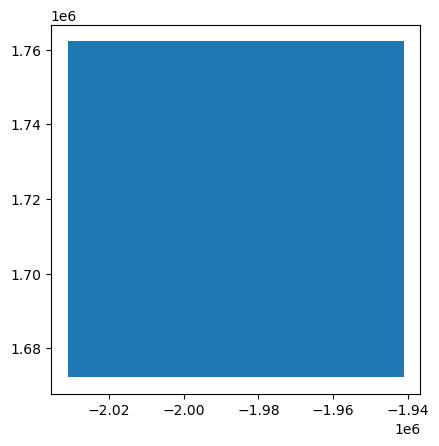

In [7]:
# create points of lulc bounding box
lulc1 = box(*lulc.rio.bounds())

# create geodataframe with lulc box
bbox = gpd.GeoDataFrame(geometry= [lulc1],
                           crs= lulc.rio.crs)
# check bbox
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

<AxesSubplot:>

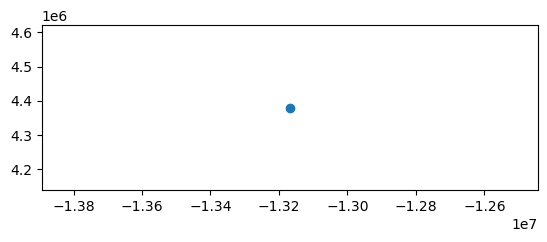

In [15]:
# create mount whitney coordinate point
point = (-13168238.600765156, 4380516.844251228)

#create mt whitney point with  coordinates point
mt_whitney = gpd.GeoDataFrame(geometry = [Point(point)],
                             crs=3857)
#check mt_whitney plot
mt_whitney.plot()

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

<AxesSubplot:>

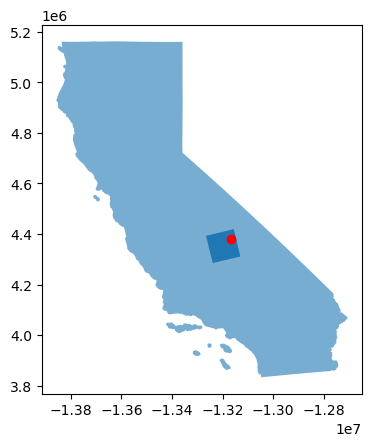

In [16]:
#update bbox CRS
bbox.to_crs(crs = 3857, inplace = True)

#preliminary plot check
fig, ax = plt.subplots()

ca.plot(ax=ax, alpha=0.6)
bbox.plot(ax=ax)
mt_whitney.plot(ax=ax, color = "red")


## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

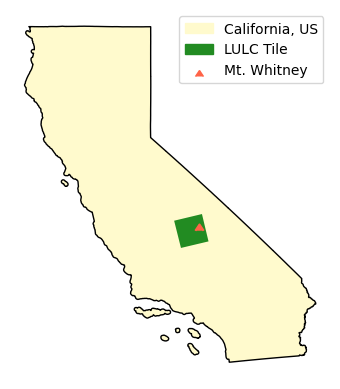

In [23]:
#create plot
fig, ax = plt.subplots()
# --------------------------------------------
#create California Plot
ca.plot(ax=ax, color = 'lemonchiffon', edgecolor = "black")
# create california legend patch
ca_patch = mpatches.Patch(color='lemonchiffon',
                          label='California, US')

# --------------------------------------------
#create lulc bbox plot
bbox.plot(ax=ax, color = 'forestgreen')
#create bbox legend patch
bbox_patch = mpatches.Patch(color='forestgreen',
                              label='LULC Tile')

# --------------------------------------------
#create mt whitney plot
mt_whitney.plot(ax=ax, color = 'tomato', marker = 6)
#create mt whitney legend patch
mt_whitney_patch = mlines.Line2D([], [], color = 'tomato', marker = 6, label = 'Mt. Whitney', linestyle = 'None')

#turn off axis
plt.axis('off')

# ------------------------------------------
# create legend
ax.legend(handles = [ca_patch, bbox_patch, mt_whitney_patch])

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
